In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:22<00:00, 192MB/s]
100% 2.70G/2.70G [00:22<00:00, 130MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
train_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))


Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

# Deep CNN

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [ ]:
ep = 11
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/11
2197/2197 [==============================] - 355s 160ms/step - loss: 2.0474 - accuracy: 0.3964 - val_loss: 0.7423 - val_accuracy: 0.7616
Epoch 2/11
2197/2197 [==============================] - 350s 159ms/step - loss: 0.5463 - accuracy: 0.8251 - val_loss: 0.3477 - val_accuracy: 0.8872
Epoch 3/11
2197/2197 [==============================] - 364s 166ms/step - loss: 0.3054 - accuracy: 0.9001 - val_loss: 0.3389 - val_accuracy: 0.8855
Epoch 4/11
2197/2197 [==============================] - 350s 159ms/step - loss: 0.2081 - accuracy: 0.9316 - val_loss: 0.2139 - val_accuracy: 0.9255
Epoch 5/11
2197/2197 [==============================] - 350s 159ms/step - loss: 0.1527 - accuracy: 0.9488 - val_loss: 0.1471 - val_accuracy: 0.9517
Epoch 6/11
2197/2197 [==============================] - 350s 159ms/step - loss: 0.1214 - accuracy: 0.9593 - val_loss: 0.1599 - val_accuracy: 0.9484
Epoch 7/11
2197/2197 [==============================] - 349s 159ms/step - loss: 0.0912 - accuracy: 0.9687 - val_

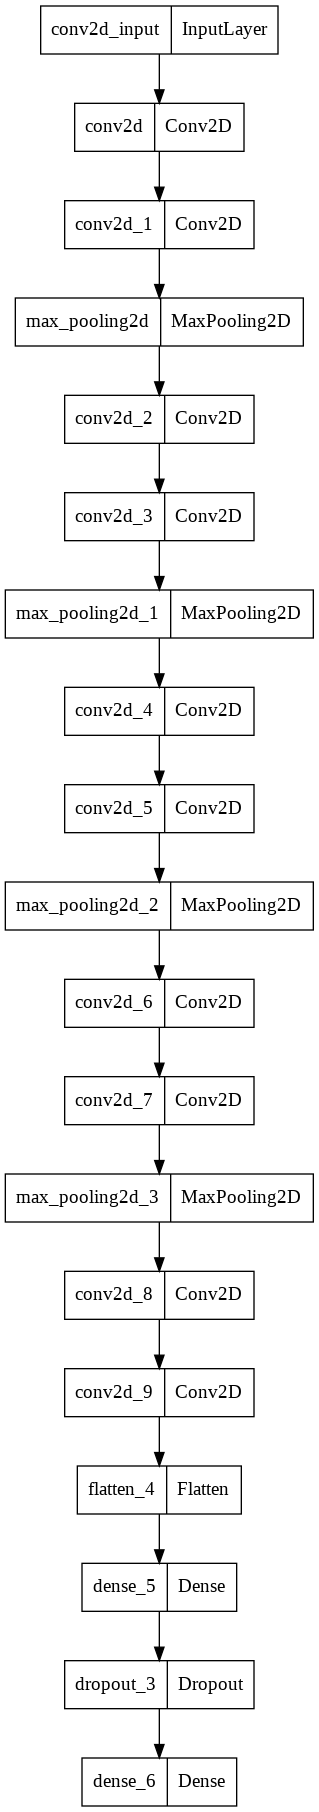

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

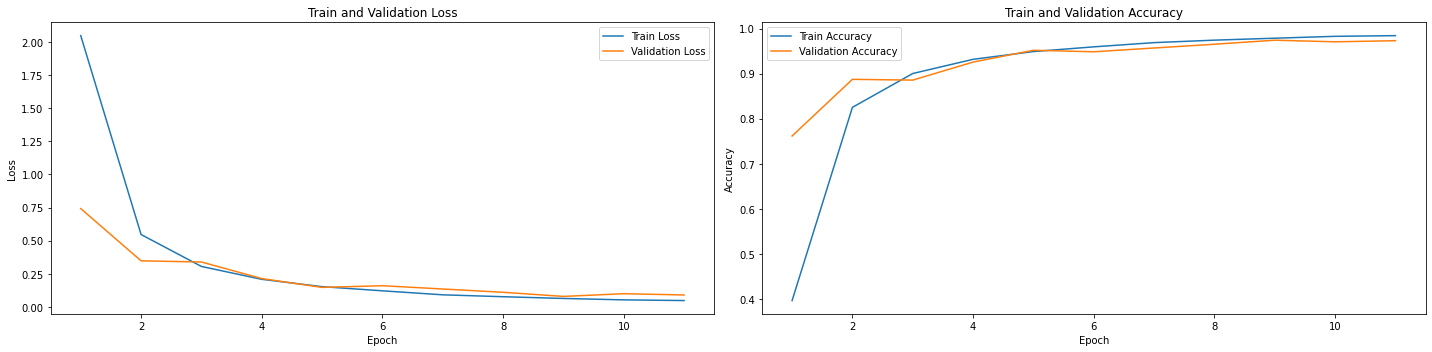

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,12),history.history['loss'],label="Train Loss")
plt.plot(range(1,12),history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,12),history.history['accuracy'], label="Train Accuracy")
plt.plot(range(1,12),history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
print(labels)

[[15, 1, 0, 9, 32, 21, 36, 27, 22, 12, 19, 26, 2, 1, 30, 31, 13, 28, 37, 25, 34, 10, 23, 30, 14, 20, 11, 34, 31, 8, 10, 33], [1, 31, 25, 5, 30, 35, 27, 25, 35, 20, 19, 7, 8, 27, 6, 29, 2, 28, 34, 1, 27, 28, 13, 2, 34, 31, 21, 37, 26, 17, 16, 31], [36, 18, 21, 27, 3, 9, 18, 2, 4, 32, 30, 17, 8, 16, 18, 21, 17, 35, 4, 10, 5, 30, 24, 12, 10, 0, 35, 29, 15, 35, 34, 10], [29, 1, 29, 13, 25, 19, 33, 8, 20, 22, 23, 0, 29, 22, 23, 2, 25, 11, 3, 16, 3, 6, 12, 34, 30, 11, 13, 37, 8, 37, 8, 22], [6, 33, 7, 2, 17, 12, 3, 23, 35, 24, 28, 17, 19, 19, 13, 32, 32, 13, 4, 23, 24, 18, 31, 3, 7, 10, 12, 23, 14, 27, 31, 23], [25, 21, 1, 36, 28, 20, 21, 21, 19, 21, 16, 28, 4, 6, 15, 5, 18, 12, 22, 16, 11, 15, 12, 37, 19, 35, 37, 28, 15, 17, 3, 14], [25, 9, 14, 25, 13, 14, 4, 13, 36, 28, 19, 27, 7, 2, 15, 30, 14, 16, 23, 19, 12, 22, 17, 0, 27, 32, 34, 21, 32, 2, 19, 27], [3, 21, 14, 10, 21, 8, 21, 8, 18, 4, 35, 12, 9, 0, 7, 5, 16, 19, 15, 27, 34, 30, 13, 22, 14, 14, 35, 5, 9, 7, 9, 10], [4, 7, 7, 12, 10, 29

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 98.42 %
Test Accuracy   : 97.30 %
Precision Score : 97.30 %
Recall Score    : 97.30 %


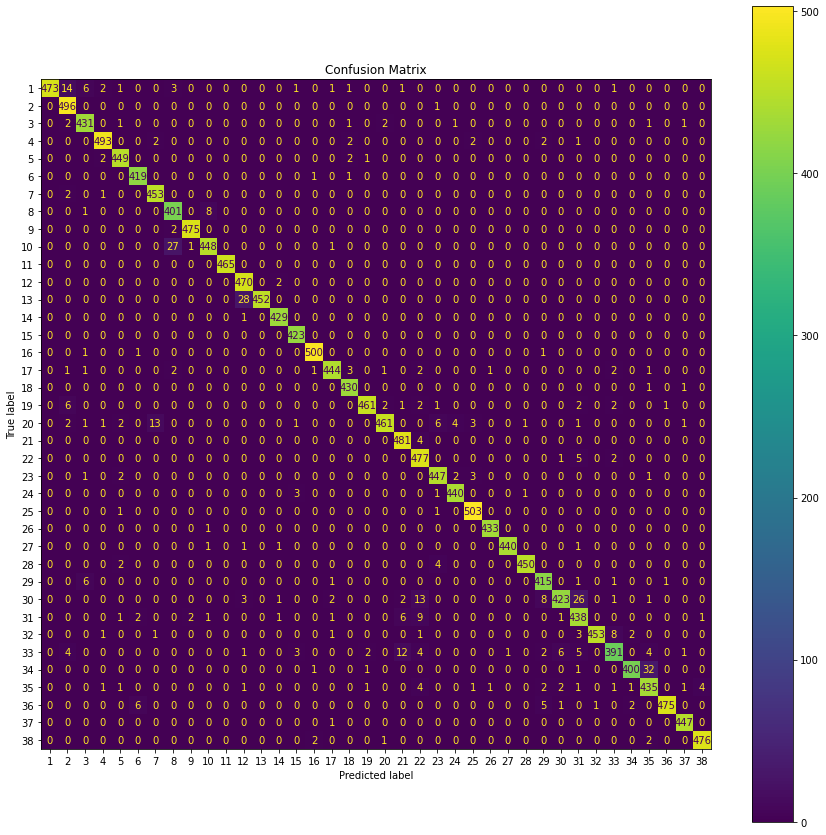

In [ ]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

#VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
IMAGE_SIZE = [256, 256] 

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x =  tf.keras.layers.Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = tf.keras.layers.Dense(38, activation='softmax')(x)

In [ ]:
model =  tf.keras.Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

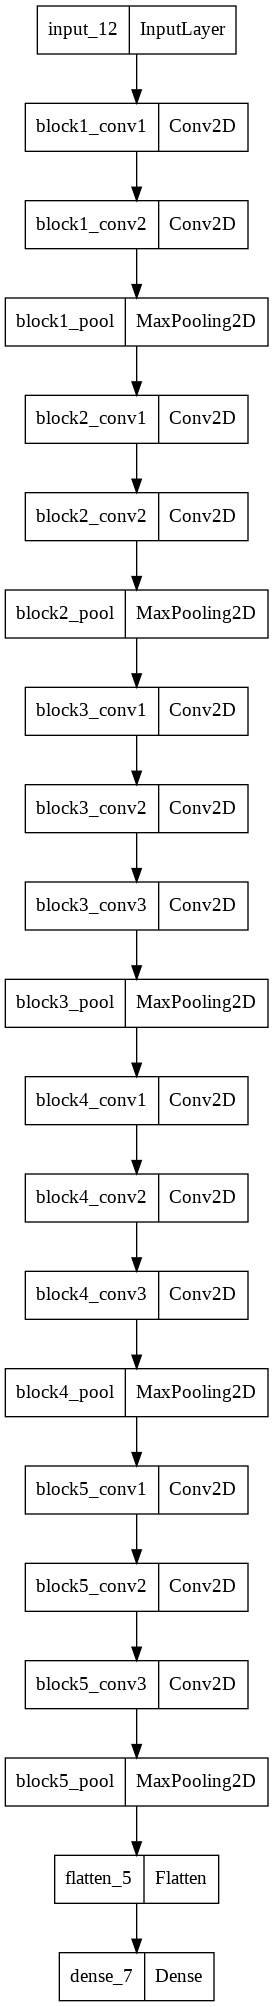

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [ ]:
epochs = 10
r = model.fit_generator(
  train_gen,
  validation_data=test_gen,
  epochs=epochs
)

Epoch 1/10
2197/2197 [==============================] - 661s 301ms/step - loss: 0.9049 - accuracy: 0.8200 - val_loss: 0.4926 - val_accuracy: 0.9029
Epoch 2/10
2197/2197 [==============================] - 660s 300ms/step - loss: 0.3481 - accuracy: 0.9291 - val_loss: 0.5075 - val_accuracy: 0.9104
Epoch 3/10
2197/2197 [==============================] - 660s 300ms/step - loss: 0.2274 - accuracy: 0.9531 - val_loss: 0.4197 - val_accuracy: 0.9274
Epoch 4/10
2197/2197 [==============================] - 660s 301ms/step - loss: 0.1596 - accuracy: 0.9655 - val_loss: 0.3261 - val_accuracy: 0.9435
Epoch 5/10
2197/2197 [==============================] - 659s 300ms/step - loss: 0.1160 - accuracy: 0.9742 - val_loss: 0.4180 - val_accuracy: 0.9347
Epoch 6/10
2197/2197 [==============================] - 660s 300ms/step - loss: 0.0861 - accuracy: 0.9803 - val_loss: 0.4143 - val_accuracy: 0.9384
Epoch 7/10
2197/2197 [==============================] - 658s 300ms/step - loss: 0.0628 - accuracy: 0.9845 - val_

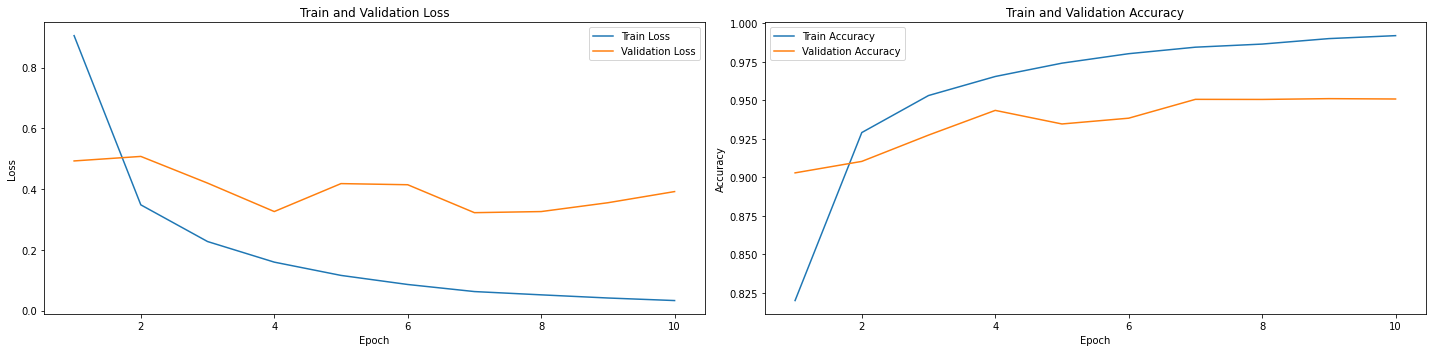

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1,11),r.history['loss'],label="Train Loss")
plt.plot(range(1,11),r.history['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,11),r.history['accuracy'], label="Train Accuracy")
plt.plot(range(1,11),r.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()

In [ ]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
print("Train Accuracy  : {:.2f} %".format(r.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.20 %
Test Accuracy   : 95.09 %
Precision Score : 95.09 %
Recall Score    : 95.09 %


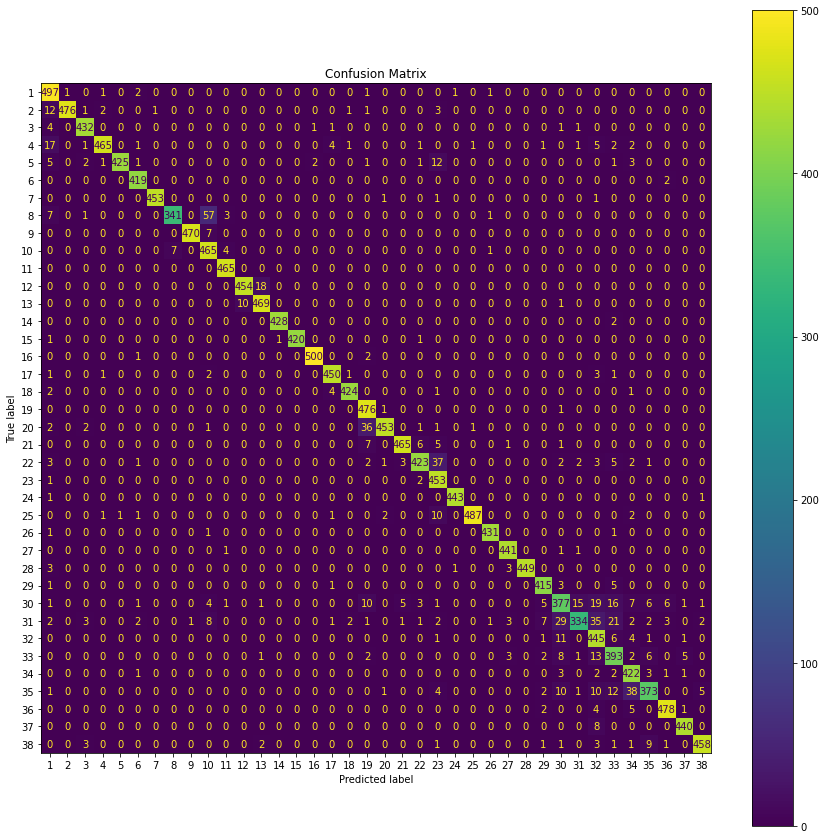

In [ ]:
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()